In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 라이브러리 추가
import numpy as np
import pandas as pd
import re
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 꼬꼬마 형태소 분석기
from konlpy.tag import Kkma
kkma = Kkma()

In [4]:
# 키워드
df = pd.read_excel('/Users/charles/git/metaverse/data/kakaoapi.xlsx', sheet_name='Sheet1',
                   index_col='datetime', parse_dates=True).drop(['Unnamed: 0'], axis=1)
df[['title']].to_csv('/Users/charles/git/metaverse/data/kakaoapi_keyword.txt', index=False, header=False)
f = open("/Users/charles/git/metaverse/data/kakaoapi_keyword.txt", 'r', encoding='UTF-8')
lines = f.readlines()
f.close()

In [5]:
# 단어 2차원 리스트
word = []
for i in range(len(lines)):
    word.append(kkma.nouns(lines[i]))
word = [[y for y in x if not len(y)==1] for x in word]   # 2자 이상 
word = [[y for y in x if not y.isdigit()] for x in word] # 숫자판별

In [6]:
# 단어 1차원 리스트 함수
def flatten(l):
    flatList = []
    for elem in l:
        if type(elem) == list:
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

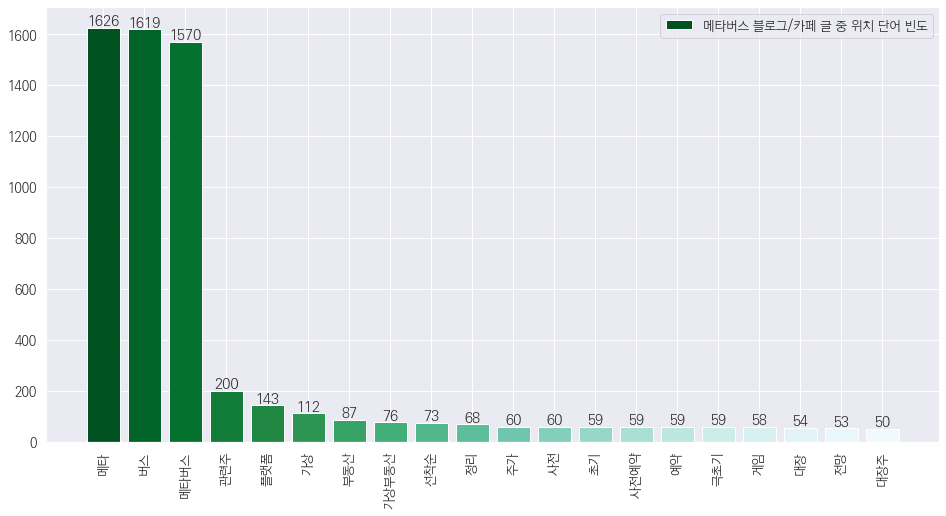

In [7]:
# 단어빈도
df = pd.DataFrame({'단어':flatten(word)})
value_counts = df['단어'].value_counts(dropna=True, sort=True)
df = pd.DataFrame(value_counts).reset_index()
df.columns = ['단어', '빈도']
sns.set(style='darkgrid', font='KoPubDotum', font_scale=1.2)
f, ax = plt.subplots(figsize=(16, 8))
plot = ax.bar(df[:20]['단어'], df[:20]['빈도'], color=sns.color_palette("BuGn_r", df[:20]['단어'].size))
for rect in plot:
              height = rect.get_height()
              ax.text(rect.get_x() + rect.get_width()/2., height, '%d' %int(height), ha='center', va='bottom')
ax.set_xticklabels(df[:20]['단어'], rotation='vertical') 
plt.legend(labels=['메타버스 블로그/카페 글 중 위치 단어 빈도'], loc='upper right')
plt.savefig('/Users/charles/git/metaverse/image/kakao_api_keyword.png', bbox_inches='tight')

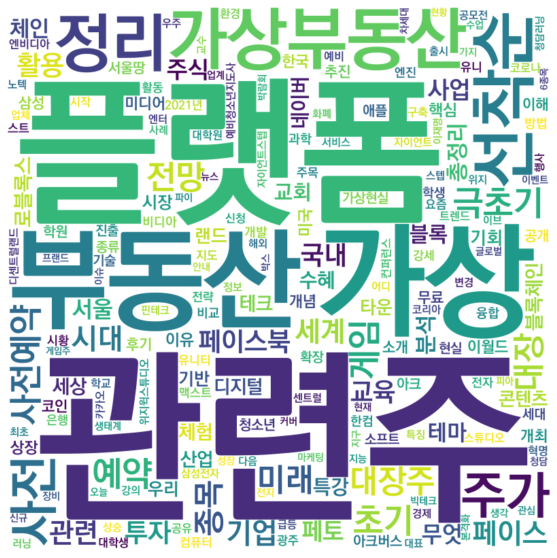

In [8]:
# 위치 단어구름
from wordcloud import WordCloud
from collections import Counter

font_path = '/Users/charles/Library/Fonts/KoPub Dotum Bold.ttf'
wordcloud = WordCloud(font_path=font_path, width=800, height=800, background_color="white")

count = Counter(flatten(word))

stopwords = ["메타버스", "메타", "버스"]
[count.pop(stopword) for stopword in stopwords]

wordcloud = wordcloud.generate_from_frequencies(count)
array = wordcloud.to_array()

fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.savefig('/Users/charles/git/metaverse/image/kakao_api_wordcloud.png', bbox_inches='tight')
plt.show()

In [9]:
# 어프라이어리(Apriori)
from apyori import apriori
# 지지도(support): P(A∩B)
result=(list(apriori(word, min_support=0.01)))
df=pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) &
                  (df['support'] >= 0.01)].sort_values(by='support', ascending=False)
df.head(20)

,items,support,ordered_statistics,length
147,"(버스, 메타)",0.993857,"[((), (버스, 메타), 0.9938574938574939, 1.0), ((메타...",2
186,"(메타버스, 버스)",0.963759,"[((), (메타버스, 버스), 0.9637592137592138, 1.0), ((...",2
144,"(메타버스, 메타)",0.963759,"[((), (메타버스, 메타), 0.9637592137592138, 1.0), ((...",2
90,"(관련주, 메타)",0.122850,"[((), (관련주, 메타), 0.12285012285012285, 1.0), ((...",2
92,"(관련주, 버스)",0.122850,"[((), (관련주, 버스), 0.12285012285012285, 1.0), ((...",2
91,"(메타버스, 관련주)",0.118550,"[((), (메타버스, 관련주), 0.11855036855036855, 1.0), ...",2
182,"(메타, 플랫폼)",0.087838,"[((), (메타, 플랫폼), 0.08783783783783784, 1.0), ((...",2
259,"(버스, 플랫폼)",0.087838,"[((), (버스, 플랫폼), 0.08783783783783784, 1.0), ((...",2
221,"(메타버스, 플랫폼)",0.086609,"[((), (메타버스, 플랫폼), 0.0866093366093366, 1.0), (...",2
61,"(메타, 가상)",0.068796,"[((), (메타, 가상), 0.0687960687960688, 1.0), ((가상...",2


In [10]:
# networkx 그래프 정의
G = nx.Graph()
ar=(df['items']); G.add_edges_from(ar)

# 페이지랭크
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

# 레이아웃
# pos = nx.planar_layout(G)
# pos = nx.rescale_layout(G)
# pos = nx.fruchterman_reingold_layout(G)
# pos = nx.spectral_layout(G)
# pos = nx.random_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.bipartite_layout(G)
# pos = nx.circular_layout(G)
# pos = nx.spring_layout(G)
pos = nx.kamada_kawai_layout(G)

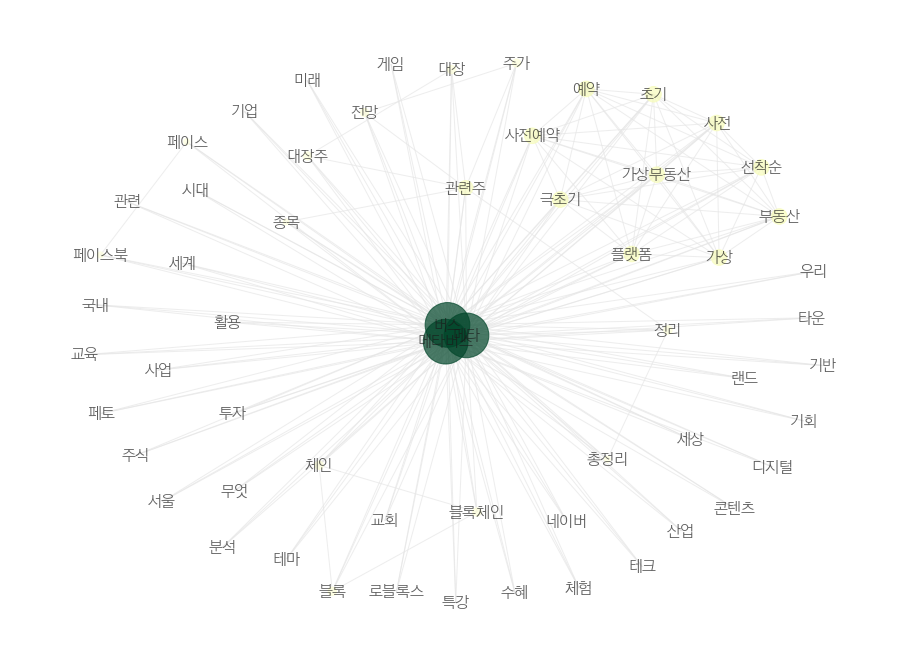

In [11]:
# 네트워크 그래프
plt.figure(figsize=(16,12)); plt.axis('off')
nx.draw_networkx(G, font_family='KoPubDotum', font_size=16,
                 pos=pos, node_color=list(pr.values()), node_size=nsize,
                 alpha=0.7, edge_color='.9', cmap=plt.cm.YlGn)
plt.savefig('/Users/charles/git/metaverse/image/kakao_api_network.png', bbox_inches='tight')